# Setup

In [73]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
data_url = 'https://epochai.org/data/epochdb/all_systems.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_url, dtype=dtypes)
pcd_df['Decimal year'] = pd.to_datetime(pcd_df['Publication date']).dt.year + (pd.to_datetime(pcd_df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(pcd_df['Publication date']).dt.day - 1) / 365

In [14]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,Citations,Base model,Finetune compute notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
0,Fugaku-LLM,Language,"Tohoku University,CyberAgent,Tokyo Institute o...",2024-05-10,Release of “Fugaku-LLM” – a large language mod...,https://www.fujitsu.com/global/about/resources...,1.300000e+10,"""Fugaku-LLM has 13 billion parameters (2)""",2.964000e+22,https://www.wolframalpha.com/input?i=6+FLOP+*+...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.357991
1,Qwen 1.5 110B,Language,Alibaba,2024-04-25,Qwen1.5-110B: The First 100B+ Model of the Qwe...,https://qwenlm.github.io/blog/qwen1.5-110b/?re...,1.100000e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.315753
2,phi-3-medium 14B,Language,Microsoft,2024-04-23,Phi-3 Technical Report: A Highly Capable Langu...,https://arxiv.org/abs/2404.14219,1.400000e+10,14B,4.032000e+23,counting operations: 6×4.8×10^12×14×10^9 ≈ 4.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.310274
3,SenseNova 5.0,Language,SenseTime,2024-04-23,NaN,https://zhidx.com/p/421866.html,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.310274
4,Llama 3-70B,Language,Meta AI,2024-04-18,Introducing Meta Llama 3: The most capable ope...,https://ai.meta.com/blog/meta-llama-3/\n\nhttp...,7.000000e+10,NaN,6.300000e+24,direct calculation\n15000000000000 tokens*7000...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.296575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Sequence-based pattern recognition,Vision,Massachusetts Institute of Technology (MIT),1955-03-01,Pattern recognition and modern computers,https://dl.acm.org/doi/10.1145/1455292.1455310,NaN,NaN,NaN,NaN,...,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1289,Self Organizing System,Other,Massachusetts Institute of Technology (MIT),1955-03-01,Generalization of pattern recognition in a sel...,https://dl.acm.org/doi/10.1145/1455292.1455309,2.250000e+02,Figure 4 contains the learnt weight matrix,NaN,NaN,...,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1290,Genetic algorithm,Other,Institute for Advanced Study,1954-07-02,Numerical testing of evolution theories,https://link.springer.com/article/10.1007/BF01...,NaN,NaN,NaN,NaN,...,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.502740
1291,SNARC,Robotics,Harvard University,1952-01-08,A Neural-Analogue Calculator Based upon a Prob...,https://en.wikipedia.org/wiki/Stochastic_neura...,4.000000e+01,The link below seems to suggest the SNARC had ...,NaN,NaN,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.019178


In [15]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])

In [16]:
pcd_df.sort_values('Publication date', inplace=True)

In [17]:
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [18]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,Citations,Base model,Finetune compute notes,Training cloud compute vendor,Batch size notes,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
1292,Theseus,Robotics,Bell Laboratories,1950-07-02,Mighty Mouse,https://www.technologyreview.com/2018/12/19/13...,4.000000e+01,The learned part is the maze configuration. Th...,4.000000e+01,"The ""training"" consists on the mouse running a...",...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.502740
1286,Perceptron Mark I,Other,"Cornell Aeronautical Laboratory,Cornell Univer...",1957-01-01,The Perceptron—a perceiving and recognizing au...,https://blogs.umass.edu/brain-wars/files/2016/...,1.000000e+03,"""Figure 4.8 Illustration of the Mark 1 percept...",6.948949e+05,Extracted from AI and Compute (https://openai....,...,1610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.000000
1285,Pandemonium (morse),Language,Massachusetts Institute of Technology (MIT),1959-02-01,Pandemonium: A Paradigm for Learning,https://aitopics.org/doc/classics:504E1BAC/,NaN,The paper mentions 11 function types. Unclear ...,6.000000e+08,"The paper mentions using an IBM 704, which can...",...,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.083333
1284,Samuel Neural Checkers,Games,IBM,1959-07-01,Some studies in machine learning using the gam...,https://ieeexplore.ieee.org/abstract/document/...,1.600000e+01,"""with 16 terms for generalization learning""\n\...",4.284000e+08,"""it can learn to do this in a remarkably short...",...,4509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.500000
1282,Perceptron (1960),Vision,Cornell Aeronautical Laboratory,1960-03-30,Perceptron Simulation Experiments,https://www.semanticscholar.org/paper/Perceptr...,1.000000e+03,""" The first program was designed to handle\nup...",7.200000e+08,"4000 * 12000 * 15\nfrom the text ""This program...",...,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960.246119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.143607
20,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.183105
19,MM1-30B,"Multimodal,Language,Vision",Apple,2024-03-14,"MM1: Methods, Analysis & Insights from Multimo...",https://arxiv.org/abs/2403.09611,3.000000e+10,30B,4.300000e+23,Pre-trained on ~2B image-text pairs and 2T tok...,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.202283
12,Mixture-of-Depths,Language,"Google DeepMind,McGill University,Mila",2024-04-02,Mixture-of-Depths: Dynamically allocating comp...,https://arxiv.org/abs/2404.02258,3.000000e+09,"Figure 4: ""We used the 12.5% capacity MoD vari...",1.000000e+20,"Figure 4: ""We used the 12.5% capacity MoD vari...",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.252740


In [19]:
outlier_window_size = 2  # years

In [20]:
start_large_scale_era = '2015-10-01'

# Top n all-time most compute-intensive (FIRST CHOICE)

In [21]:
for n in range(1, 21):
    # Add a column to mark the top n models
    pcd_df[f'top_{n}_at_release'] = False
    
    for row, model in pcd_df.iterrows():
        # Filter for models released through the model's release date
        yearly_df = pcd_df[pcd_df['Decimal year'] <= model['Decimal year']]
        # get the top n models by compute
        top_n_models = yearly_df.nlargest(n, 'Training compute (FLOP)')
        # mark these models in the original dataframe
        pcd_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

In [22]:
pcd_df.columns

Index(['System', 'Domain', 'Organization', 'Publication date', 'Reference',
       'Link', 'Parameters', 'Parameters notes', 'Training compute (FLOP)',
       'Training compute notes', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes', 'Abstract',
       'Confidence', 'Model accessibility', 'Last modified', 'Created By',
       'Country (from Organization)', 'Organization categorization',
       'Training dataset', 'Authors', 'Notability criteria',
       'Notability criteria notes', 'Training hardware', 'Exclude',
       'Hardware quantity', 'Hardware utilization', 'Training time (hours)',
       'Training time notes', 'Batch size', 'Approach',
       'Training compute lower bound', 'Epochs', 'Foundation model',
       'Training data center', 'Citations', 'Base model',
       'Finetune compute notes', 'Training cloud compute vendor',
       'Batch size notes', 'Finetune compute (FLOP)',
       'Training compute upper bound', 'Archived links', 

In [23]:
np.sum(pcd_df['top_4_at_release'])

74

In [24]:
pcd_df_n = pcd_df[(pcd_df['Decimal year'] > 2015.75) & (pcd_df['Decimal year'] < 2024)].copy()

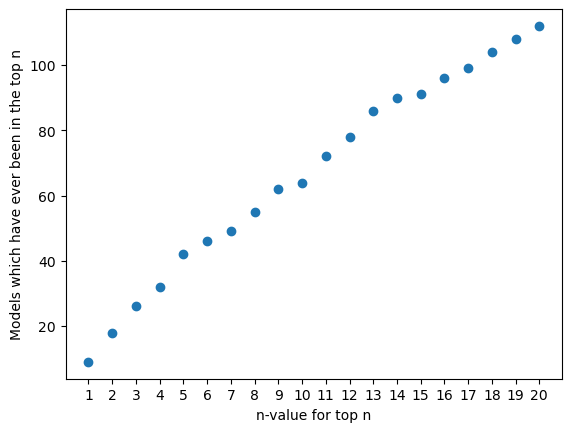

In [25]:
top_n = [np.sum(pcd_df_n[f'top_{n}_at_release']) for n in range(1, 21)]
plt.scatter(range(1, 21), top_n)
plt.xticks(ticks=range(1, 21))
plt.xlabel('n-value for top n')
plt.ylabel('Models which have ever been in the top n')
plt.show()

In [26]:
top_n_models = {}
for n in range(1, 21):
    models = pcd_df_n[pcd_df_n[f'top_{n}_at_release']]['System'].values.tolist()
    top_n_models[n] = set(models)

for n in range(20, 1, -1):
    top_n_models[n] = list(top_n_models[n].difference(top_n_models[n-1]))
top_n_models[1] = list(top_n_models[1])

In [27]:
with open('data/frontier_systems_by_top_n.json', 'w') as f:
    json.dump(top_n_models, f, indent=4)

# Default large scale systems

https://colab.research.google.com/drive/1PLGY5ErysqQMfy7Z08uIR2cTnnDgSaVR?usp=sharing

In [28]:
high_outliers_z_value_threshold = 0.76

In [29]:
large_scale_idx = set()

for index, row in pcd_df.iterrows():
  # Filter entries in a 2-year window around the paper
  window_size = pd.Timedelta(f'{outlier_window_size*52*7} days')
  half_window_size = window_size / 2
  mask = ( row['Publication date'] - half_window_size <= pcd_df['Publication date'] ) &\
        ( pcd_df['Publication date'] <= row['Publication date'] + half_window_size )
  window_df = pcd_df[mask].copy()

  if len(window_df) < 2: continue

  window_df['Training compute (FLOP) z scores'] = stats.zscore(np.log10(window_df['Training compute (FLOP)'].values))
  if window_df.loc[index, 'Training compute (FLOP) z scores'] > high_outliers_z_value_threshold:
    large_scale_idx.add(index)

large_scale_mask = pcd_df.index.isin(large_scale_idx) & (pcd_df['Publication date'] > start_large_scale_era)

In [30]:
large_scale_df = pcd_df[large_scale_mask]

In [31]:
large_scale_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,top_11_at_release,top_12_at_release,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release
1010,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,1.900000e+21,This number is pretty uncertain. I expect it t...,...,True,True,True,True,True,True,True,True,True,True
971,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,Table 5 in 'Outrageously Large Neural Networks...,6.900000e+21,sqrt(10 * 100) factor added because production...,...,True,True,True,True,True,True,True,True,True,True
970,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,Table 3,4.360000e+20,60 K80 GPUs * 30 days * 8.5 TFLOPS/GPU * 0.33 ...,...,True,True,True,True,True,True,True,True,True,True
964,NASv3 (CIFAR-10),Vision,Google Brain,2016-11-05,Neural Architecture Search with Reinforcement ...,https://arxiv.org/abs/1611.01578,3.740000e+07,Table 1,2.200000e+21,"50 epochs * 50,000 images * 10.0 GFLOPSs * 128...",...,True,True,True,True,True,True,True,True,True,True
949,AlphaGo Master,Games,DeepMind,2017-01-01,Mastering the game of Go without human knowledge,https://www.nature.com/articles/nature24270,NaN,NaN,2.000100e+23,This is a guess. There was no single journal p...,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,72B,1.300000e+24,"72 billion params, 3 trillion tokens\n72b * 3T...",...,False,True,True,True,True,True,True,True,True,True
72,Gemini Ultra,"Multimodal,Language,Vision",Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,5.000000e+25,This number is an estimate based on limited ev...,...,True,True,True,True,True,True,True,True,True,True
29,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,True,True,True,True,True,True,True,True,True,True
20,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,True,True,True,True,True,True,True,True,True,True


In [32]:
for system in large_scale_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini Ultra
Qwen-72B
Inflection-2
Grok-1
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
PaLM 2
GPT-4
LLaMA-65B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
U-PaLM (540B)
Flan-PaLM 540B
BlenderBot 3
GLM-130B
Minerva (540B)
Parti
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
GShard (dense)
iGPT-XL
GPT-3 175B (davinci)
Turing-NLG
Meena
ContextNet + Noisy Student
OpenAI Five
OpenAI Five Rerun
AlphaStar
T5-11B
Megatron-LM (8.3B)
Megatron-BERT
RoBERTa Large
XLNet
MnasNet-A3
MnasNet-A1 + SSDLite
GPT-2 (1.5B)
BigGAN-deep 512x512
FTW
ResNeXt-101 32x48d
AmoebaNet-A (F=448)
IMPALA
AlphaZero
AlphaGo Zero
OpenAI TI7 DOTA 1v1
JFT
Libratus
AlphaGo Master
NASv3 (CIFAR-10)
Xception
GNMT
AlphaGo Lee


# Percentiles (SECOND CHOICE)

In [33]:
frontier_systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_frontier_systems = pcd_df['System'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30')) & (pcd_df['Publication date'] < pd.to_datetime('2024-01-01'))].values

  frontier_systems_by_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [34]:
frontier_systems_by_percentile

{95: ['GNMT',
  'AlphaGo Master',
  'AlphaGo Zero',
  'AlphaZero',
  'ResNeXt-101 32x48d',
  'FTW',
  'Megatron-BERT',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'Megatron-Turing NLG 530B',
  'PaLM (540B)',
  'Minerva (540B)',
  'GPT-4',
  'Gemini Ultra'],
 90: ['NASv3 (CIFAR-10)',
  'T5-11B',
  'AlphaStar',
  'mT5-XXL',
  'Switch',
  'Gopher (280B)',
  'ERNIE 3.0 Titan',
  'Chinchilla',
  'Flan-PaLM 540B',
  'U-PaLM (540B)',
  'GPT-3.5 (text-davinci-003)',
  'PaLM 2',
  'Claude 2',
  'Inflection-2'],
 85: ['AlphaGo Fan',
  'AlphaGo Lee',
  'JFT',
  'AmoebaNet-A (F=448)',
  'Megatron-LM (8.3B)',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'Yuan 1.0',
  'GLaM',
  'LaMDA',
  'OPT-175B',
  'BLOOM-176B',
  'Falcon-180B',
  'Grok-1'],
 80: ['OpenAI TI7 DOTA 1v1',
  'IMPALA',
  'BigGAN-deep 512x512',
  'GPT-2 (1.5B)',
  'XLNet',
  'iGPT-XL',
  'DALL-E',
  'ByT5-XXL',
  'HyperCLOVA',
  'AlphaCode',
  'ST-MoE',
  'Flamingo',
  'Parti',
  'BlenderBot 3',
  'Llama 2-70B',
  'ChatGLM3',

In [35]:
# Save to JSON
with open('data/frontier_systems_by_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_percentile, f, indent=4)

In [36]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_percentile.items():
  total_num_systems += len(systems)
  print(percentile, 'to', percentile + percentile_interval)
  print(len(systems), "systems")
  print(f'Total systems above {percentile}th percentile: {total_num_systems}')
  for system in systems[::-1]:
    print(system)
  print()

95 to 100
15 systems
Total systems above 95th percentile: 15
Gemini Ultra
GPT-4
Minerva (540B)
PaLM (540B)
Megatron-Turing NLG 530B
GPT-3 175B (davinci)
Meena
OpenAI Five
Megatron-BERT
FTW
ResNeXt-101 32x48d
AlphaZero
AlphaGo Zero
AlphaGo Master
GNMT

90 to 95
14 systems
Total systems above 90th percentile: 29
Inflection-2
Claude 2
PaLM 2
GPT-3.5 (text-davinci-003)
U-PaLM (540B)
Flan-PaLM 540B
Chinchilla
ERNIE 3.0 Titan
Gopher (280B)
Switch
mT5-XXL
AlphaStar
T5-11B
NASv3 (CIFAR-10)

85 to 90
14 systems
Total systems above 85th percentile: 43
Grok-1
Falcon-180B
BLOOM-176B
OPT-175B
LaMDA
GLaM
Yuan 1.0
Turing-NLG
OpenAI Five Rerun
Megatron-LM (8.3B)
AmoebaNet-A (F=448)
JFT
AlphaGo Lee
AlphaGo Fan

80 to 85
17 systems
Total systems above 80th percentile: 60
Qwen-72B
ChatGLM3
Llama 2-70B
BlenderBot 3
Parti
Flamingo
ST-MoE
AlphaCode
HyperCLOVA
ByT5-XXL
DALL-E
iGPT-XL
XLNet
GPT-2 (1.5B)
BigGAN-deep 512x512
IMPALA
OpenAI TI7 DOTA 1v1

75 to 80
16 systems
Total systems above 75th percentile: 76

# Backward window percentile

In [37]:
frontier_systems_by_backward_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
    print(percentile)
    percentile_compute_low = np.zeros(len(pcd_df))
    percentile_compute_high = np.zeros(len(pcd_df))
    # Iterate through each row and calculate the 2-year moving average for each date
    for i, (index, row) in enumerate(pcd_df.iterrows()):
        # Define the 1-year window
        start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
        end_date = row['Publication date']

        # Filter the DataFrame for this window
        window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

        percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
        percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

    frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
    extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

    # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
    extra_frontier_systems = pcd_df['System'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30')) & (pcd_df['Publication date'] < pd.to_datetime('2024-01-01'))].values

    frontier_systems_by_backward_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [38]:
frontier_systems_by_backward_percentile

{95: ['AlphaGo Fan',
  'AlphaGo Lee',
  'GNMT',
  'AlphaGo Master',
  'AlphaGo Zero',
  'Megatron-BERT',
  'Megatron-LM (8.3B)',
  'T5-11B',
  'AlphaStar',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'HyperCLOVA',
  'Megatron-Turing NLG 530B',
  'Yuan 1.0',
  'Gopher (280B)',
  'GLaM',
  'ERNIE 3.0 Titan',
  'PaLM (540B)',
  'Minerva (540B)',
  'U-PaLM (540B)',
  'GPT-3.5 (text-davinci-003)',
  'GPT-4',
  'PaLM 2',
  'Claude 2',
  'Inflection-2',
  'Gemini Ultra'],
 90: ['NASv3 (CIFAR-10)',
  'ResNeXt-101 32x48d',
  'GPT-2 (1.5B)',
  'XLNet',
  'RoBERTa Large',
  'mT5-XXL',
  'DALL-E',
  'Switch',
  'Meta Pseudo Labels',
  'ProtT5-XXL',
  'ByT5-XXL',
  'GOAT',
  'LaMDA',
  'Chinchilla',
  'OPT-175B',
  'Flan-PaLM 540B',
  'xTrimoPGLM -100B',
  'Falcon-180B',
  'Grok-1'],
 85: ['DeepSpeech2 (English)',
  'AlphaZero',
  'FTW',
  'BigGAN-deep 512x512',
  'BERT-Large-CAS (PTB+WT2+WT103)',
  'MnasNet-A1 + SSDLite',
  'MnasNet-A3',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'CoAtNe

In [39]:
# Save to JSON
with open('data/frontier_systems_by_backward_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_backward_percentile, f, indent=4)

In [40]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_backward_percentile.items():
    total_num_systems += len(systems)
    print(percentile, 'to', percentile + percentile_interval)
    print(len(systems), "systems")
    print(f'Total systems above {percentile}th percentile: {total_num_systems}')
    for system in systems[::-1]:
        print(system)
    print()

95 to 100
27 systems
Total systems above 95th percentile: 27
Gemini Ultra
Inflection-2
Claude 2
PaLM 2
GPT-4
GPT-3.5 (text-davinci-003)
U-PaLM (540B)
Minerva (540B)
PaLM (540B)
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA
GPT-3 175B (davinci)
Meena
OpenAI Five
AlphaStar
T5-11B
Megatron-LM (8.3B)
Megatron-BERT
AlphaGo Zero
AlphaGo Master
GNMT
AlphaGo Lee
AlphaGo Fan

90 to 95
19 systems
Total systems above 90th percentile: 46
Grok-1
Falcon-180B
xTrimoPGLM -100B
Flan-PaLM 540B
OPT-175B
Chinchilla
LaMDA
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
RoBERTa Large
XLNet
GPT-2 (1.5B)
ResNeXt-101 32x48d
NASv3 (CIFAR-10)

85 to 90
22 systems
Total systems above 85th percentile: 68
Qwen-72B
Yi-34B
ChatGLM3
Llama 2-70B
LLaMA-65B
BLOOM-176B
BlenderBot 3
Parti
ST-MoE
GPT-NeoX-20B
AlphaCode
FLAN 137B
CoAtNet
Turing-NLG
OpenAI Five Rerun
MnasNet-A3
MnasNet-A1 + SSDLite
BERT-Large-CAS (PTB+WT2+WT103)
BigGAN-deep 512x512
FTW
AlphaZero
DeepSpeech2 

# Residuals from compute trend (last choice)

In [87]:
frontier_systems_by_residual = {}

In [74]:
# compute in log scale
pcd_df['log compute'] = np.log10(pcd_df['Training compute (FLOP)'])

In [75]:
x = pcd_df['Decimal year'].values.reshape(-1, 1)
y = pcd_df['log compute']
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [76]:
# Model coefficients from regression on training compute in the Epoch database
a, b = regressor.coef_[0], regressor.intercept_

In [82]:
# find residuals of all models
pcd_df['residual'] = pcd_df['log compute'] - (a * pcd_df['Decimal year'] + b)

# sort models by residuals
pcd_df.sort_values(by='residual', axis=0, inplace=True)

In [85]:
chunk_size = pcd_df.shape[0] / 20
indices = [round(chunk_size*i) for i in range(21)]

In [90]:
for i in range(20):
    frontier_systems_by_residual[5*i] = pcd_df['System'].values.tolist()[indices[i]:indices[i+1]]

In [91]:
frontier_systems_by_residual

{0: ['SPIDER2',
  'LSTM+NeuralCache',
  'Fine-tuned-AWD-LSTM-DOC(fin)',
  'Multi-cell LSTM',
  'Swift',
  '2-layer-LSTM+Deep-Gradient-Compression',
  'Image Classification with the Fisher Vector: Theory and Practice',
  'AWD-LSTM+WT+Cache+IOG (WT2)',
  'ISS',
  'Mogrifier RLSTM (WT2)',
  'Image generation',
  'DARTS',
  'VD-RHN',
  'LSTM-Char-Large',
  'EI-REHN-1000D',
  'Pointer Sentinel-LSTM (medium)',
  'Search-Proven Best LSTM',
  'ENAS'],
 5: ['System 11',
  'Variational (untied weights, MC) LSTM (Large)',
  'Neural Architecture Search with base 8 and shared embeddings',
  '6-layer MLP (MNIST)',
  'Pluribus',
  'Innervator',
  'DeiT',
  'Fuzzy NN',
  'DQN',
  'Zoneout + Variational LSTM (WT2)',
  'VD-LSTM+REAL Large',
  'Feedforward NN',
  'aLSTM(depth-2)+RecurrentPolicy (WT2)',
  'RNN+weight noise+dynamic eval',
  'CT-MoS (WT2)',
  'BiLSTM for Speech',
  'Dropout-LSTM+Noise(Bernoulli) (WT2)',
  'TransformerXL + spectrum control'],
 10: ['Fraternal dropout + AWD-LSTM 3-layer (WT2)

In [92]:
# Save to JSON
with open('data/frontier_systems_by_residual.json', 'w') as f:
    json.dump(frontier_systems_by_residual, f, indent=4)

# Distance from compute record at the time

In [41]:
ooms_from_frontier = 2

In [42]:
current_max = 0
running_max = np.zeros(len(pcd_df))
for i, compute in enumerate(pcd_df['Training compute (FLOP)']):
  if compute > current_max:
    running_max[i] = compute
    current_max = compute
  else:
    running_max[i] = current_max
running_max

array([4.00000000e+01, 6.94894938e+05, 6.00000000e+08, 6.00000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 2.76640650e+10, 2.83280026e+10, 2.83280026e+10,
       2.83280026e+10, 8.11870414e+10, 8.11870414e+10, 1.82321576e+13,
       1.82321576e+13, 1.82321576e+13, 2.10080000e+13, 2.10080000e+13,
       6.30000000e+13, 1.30389876e+15, 1.30389876e+15, 1.30389876e+15,
       1.30389876e+15, 1.30389876e+15, 3.41463600e+15, 6.14400000e+16,
       6.14400000e+16, 6.14400000e+16, 6.14400000e+16, 2.73196800e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 1.34092800e+18,
       1.34092800e+18, 1.34092800e+18, 1.34092800e+18, 1.34092800e+18,
       3.41107200e+18, 3.41107200e+18, 3.41107200e+18, 9.25344000e+18,
       9.25344000e+18, 5.60000000e+19, 5.60000000e+19, 5.60000000e+19,
      

In [43]:
pcd_df['Frontier training compute (FLOP)'] = running_max

In [44]:
pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)
pcd_df[['System', 'Frontier system']]

,System,Frontier system
1292,Theseus,False
1286,Perceptron Mark I,False
1285,Pandemonium (morse),False
1284,Samuel Neural Checkers,False
1282,Perceptron (1960),False
...,...,...
29,MegaScale (Production),True
20,Inflection-2.5,True
19,MM1-30B,False
12,Mixture-of-Depths,False


In [45]:
frontier_df = pcd_df[pcd_df['Frontier system']]
frontier_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Parameters notes,Training compute (FLOP),Training compute notes,...,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release,Frontier training compute (FLOP),Frontier system
1016,DeepSpeech2 (English),Speech,Baidu Research - Silicon Valley AI Lab,2015-12-08,Deep Speech 2: End-to-End Speech Recognition i...,https://arxiv.org/abs/1512.02595,3.800000e+07,All networks have 38 million parameters.,2.600000e+19,1 timestep = (1280 hidden units)^2 * (7 RNN la...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1014,ResNet-152 (ImageNet),Vision,Microsoft,2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,6.000000e+07,Taken from https://arxiv.org/abs/1605.07146,1.210000e+19,(11.4 *10^9) mult-adds per forward pass\n2 FLO...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
1010,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,1.900000e+21,This number is pretty uncertain. I expect it t...,...,True,True,True,True,True,True,True,True,1.900000e+21,True
971,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,Table 5 in 'Outrageously Large Neural Networks...,6.900000e+21,sqrt(10 * 100) factor added because production...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
970,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,Table 3,4.360000e+20,60 K80 GPUs * 30 days * 8.5 TFLOPS/GPU * 0.33 ...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,72B,1.300000e+24,"72 billion params, 3 trillion tokens\n72b * 3T...",...,True,True,True,True,True,True,True,True,2.100000e+25,True
72,Gemini Ultra,"Multimodal,Language,Vision",Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,5.000000e+25,This number is an estimate based on limited ev...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
29,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,"Production run is stated to have ""hundreds of ...",1.200000e+25,Speculative. The model is stated to have train...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
20,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,1.000100e+25,"""Inflection-1 used approximately 4% the traini...",...,True,True,True,True,True,True,True,True,5.000000e+25,True


In [46]:
for system in frontier_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini Ultra
Qwen-72B
Inflection-2
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
LLaMA-7B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Taiyi-Stable Diffusion
U-PaLM (540B)
Flan-PaLM 540B
Flan-T5 11B
Whisper
PaLI
BlenderBot 3
GLM-130B
AlexaTM 20B
ESM2-15B
Minerva (540B)
Parti
CoCa
UL2
OPT-175B
Flamingo
Stable Diffusion (LDM-KL-8-G)
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
RETRO-7B
AlphaCode
ERNIE 3.0 Titan
XGLM-7.5B
XGLM
GLaM
Gopher (280B)
Student of Games
Florence
BASIC-L
T0-XXL
Yuan 1.0
Megatron-Turing NLG 530B
AlphaFold-Multimer
HyperCLOVA
FLAN 137B
SEER
GOAT
HuBERT
ERNIE 3.0
ALIGN
DeBERTa
CoAtNet
ByT5-XXL
CogView
ProtT5-XXL
ProtT5-XXL-BFD
ProtBERT-BFD
PLUG
M6-T
Meta Pseudo Labels
MSA Transformer
Switch
DALL-E
CLIP (ViT L/14@336px)
ViT-Huge/14
mT5-XXL
Conformer + Wav2vec 2.0 + Noisy Student
GShard (dense)
iGPT-L
iGPT-XL
GPT

# Constant threshold

In [47]:
compute_threshold = 1e23

In [48]:
above_threshold = pcd_df[pcd_df['Training compute (FLOP)'] > compute_threshold]

In [49]:
print(len(above_threshold), 'systems')
for system in above_threshold['System'][::-1]:
  print(system)

54 systems
Llama 3-70B
MM1-30B
Inflection-2.5
MegaScale (Production)
FunSearch
Gemini Ultra
Qwen-72B
Inflection-2
Nemotron-3-8B
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
FinGPT-13B
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
WizardCoder-15.5B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
U-PaLM (540B)
Flan-PaLM 540B
BlenderBot 3
GLM-130B
AlexaTM 20B
Minerva (540B)
Parti
UL2
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA
GPT-3 175B (davinci)
Meena
AlphaGo Zero
AlphaGo Master
